# 미니프로젝트 1차 회의 준비자료

*   사용된 데이터 - https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset?select=framingham.csv
*   data preprocessing을 통해 자료의 특성을 파악/정리
*   제안사항 : 한정된 변수로 charge값을 예측하는 것이 적절할지를 고민해보는 과정이 필요할 것 같습니다.

[진행 과정]
1. 변수별 범위 / 범주형 변수는 빈도 체크
2. 변수 전처리
3. 모델 적합해보기 (charge 변수 없이)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [36]:
#변수 살펴보기
data=pd.read_csv("C:/Users/SAMSUNG/Desktop/framingham.csv")
print(data.info())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


[변수설명]

Demographic:
*    성별: male or female(Nominal)
*    나이
*    교육수준

Behavioral:
*    현재 흡연여부: whether or not the patient is a current smoker (Nominal)
*    하루 평균 담배량: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Information on medical history(병력):
*    BP Meds: 혈압약 복용 여부 (Nominal)
*    Prevalent Stroke: 뇌졸중 여부 (Nominal)
*    Prevalent Hyp: 고혈압 여부 (Nominal)
*    Diabetes: 당뇨병 여부 (Nominal)

Information on current medical condition:
*    Tot Chol: 총 콜레스테롤 수치 (Continuous)
*    Sys BP: systolic blood pressure (Continuous)
*    Dia BP: diastolic blood pressure (Continuous)
*    BMI: Body Mass Index (Continuous)
*    Heart Rate: 심박수 (Continuous)
*    Glucose: 포도당 수치 (Continuous)

Target variable to predict:
*    10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [37]:
#종속변수 범주별 count
data['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

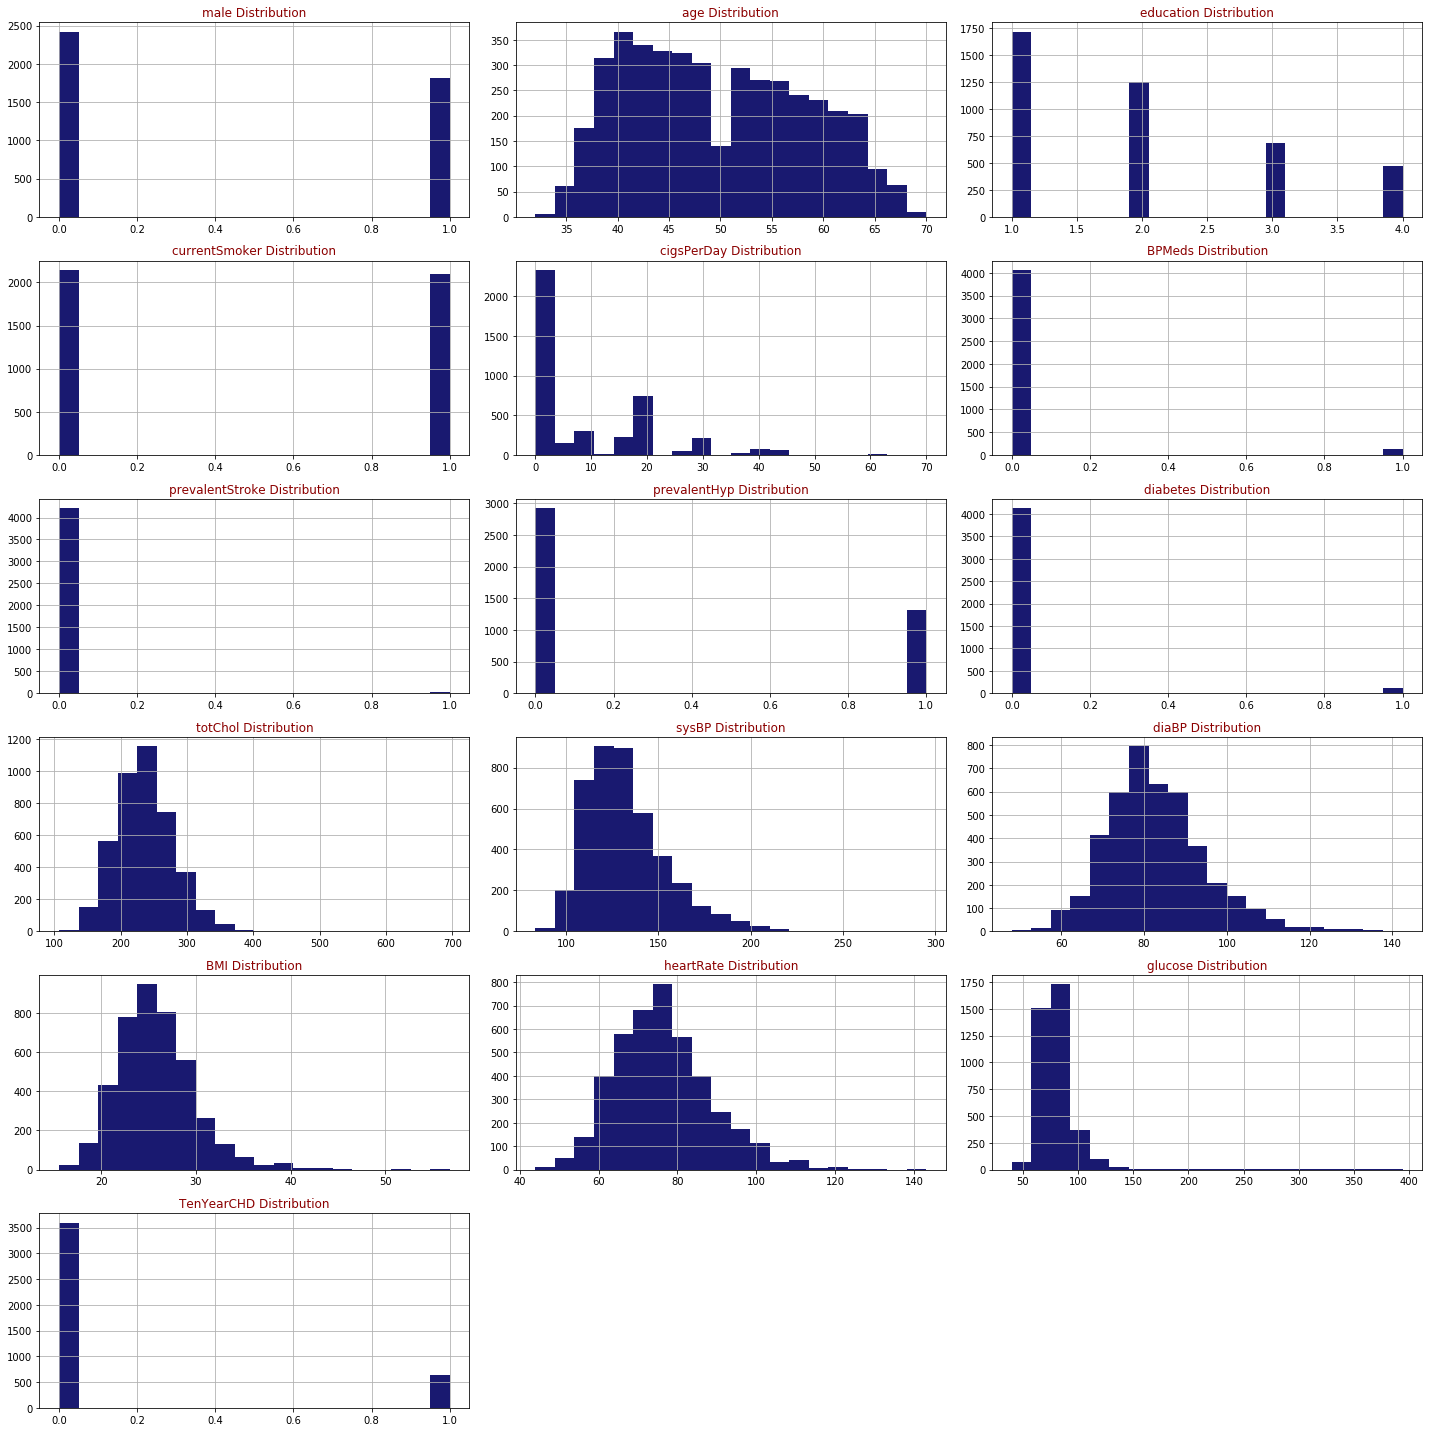

In [17]:
#변수별 히스토그램 - 변수별 분포를 살펴보기 위함.
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [38]:
# 중복데이터 체크
duplicate = data[data.duplicated()]
duplicate

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [39]:
# 결측치 빈도
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [40]:
#겹치는 변수 - 흡연여부, 나이, 성별, bmi
#나이의 범위 - 32세~70세 (조정 필요)
data['age'].describe()

count    4240.000000
mean       49.580189
std         8.572942
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [41]:
#상관성이 적어보이는 교육수준 변수를 제거하기로 함.
from scipy.stats import chi2_contingency
edu = data['education']
Y = data['TenYearCHD']
contingency = pd.crosstab(edu,Y)
contingency

TenYearCHD,0,1
education,,
1.0,1397,323
2.0,1106,147
3.0,601,88
4.0,403,70


In [43]:
#근거
chi, p, dof, expected = chi2_contingency(contingency)

print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{contingency}", sep = "\n" )

chi 스퀘어 값: 32.0170399303682
p-value (0.05): 5.190369142973463e-07
자유도 수: 3
기대값: 
             0           1
0  1458.776300  261.223700
1  1062.701572  190.298428
2   584.358646  104.641354
3   401.163482   71.836518
측정값: 
TenYearCHD     0    1
education            
1.0         1397  323
2.0         1106  147
3.0          601   88
4.0          403   70


여기까지의 결론 : education 변수는 제거하고, 결측치도 모두 제거

In [44]:
# Dropping columns education
data = data.drop(['education'], axis=1)
# 결측치를 가진 모든 행을 제거
data = data.dropna()
print(data.isna().sum())
data.columns

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

앞으로 해야할 것
*    보험 데이터셋의 범위를 파악해 공통변수의 범위를 조정
*    조정된 데이터를 활용해 예측 수행 (나중에 charge 변수가 포함된 결과와 비교하기 위함)
*    보험 데이터셋에서의 charge 변수 예측의 신뢰를 높이기 위한 방안 고민